#Question 1

In [ ]:
#gx = e^-x
#0,1 a,b
#u=1

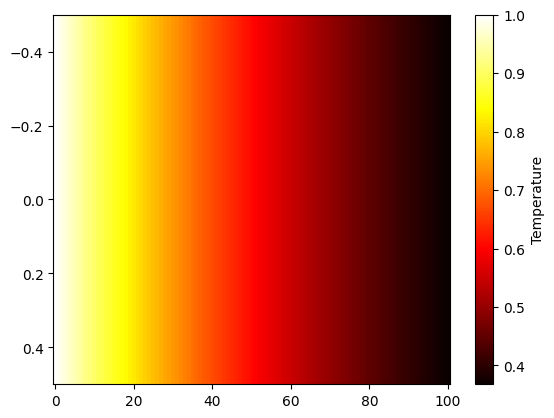

In [ ]:
# %%
# Uncomment below line: This line is required to make the animation work in VSCode (Using `ipympl` as the backend for matplotlib plots)
# %matplotlib ipympl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np


# Below lines are to ignore the pylint warning in VSCode
# pylint: disable=abstract-method
# pylint: disable=pointless-string-statement
# pylint: disable=invalid-name


def get_tridiag_matrix(n, a, b, c):
    """
    Returns a tri-diagonal matrix of size n x n with the given diagonal elements
    """
    return np.eye(n, k=-1) * a + np.eye(n, k=0) * b + np.eye(n, k=1) * c


def solve1DHeatEquation(uT0, u0, uL, f, L, mu, T, h, ht):
    """
    Solves the 1D heat equation using the finite difference method
    """
    Nx = int(L // h) + 1  # Number of points on the rod
    xs = np.linspace(0, L, Nx + 1)  # points on the rod

    Nt = int(T // ht) + 1  # Number of time steps
    ts = np.linspace(0, T, Nt + 1)  # Instances in time

    us = np.array([uT0(x) for x in xs])  # Initial conditions

    # Initialize the tri-diagonal matrix A
    A = get_tridiag_matrix(Nx + 1, 1, -2, 1)

    # The values of u generated by the PDE at different times
    result = [us]

    # Solve the PDE for each time step
    for t in ts[1:]:
        # Calculate the values of f at different points
        fMat = np.array([f(x, t) for x in xs])

        # Calculate the derivative of u
        du = ((mu / (h**2)) * (A @ us)) + fMat

        # Update the values of u
        us = us + ht * du

        # Update the values at the boundary points
        us[0] = u0(t)
        us[-1] = uL(t)

        result.append(us)

    return result, xs, ts


def plot1DHeatEquationAnimation(usVals, xs, L, mu, show_graph=False):
    """
    Plots the animation of the 1D Heat Equation
    """
    # Figure and Axes of the plot
    fig = plt.figure()
    ax = plt.axes()

    # What should be plotted and updated at each animation frame
    patches = []

    # Plot the initial condition
    if not show_graph:
        plt1 = plt.imshow([usVals[0]], cmap="hot", aspect="auto", animated=True)
        cb = fig.colorbar(plt1)  # Add colorbar
        cb.set_label("Temperature")  # Add label to colorbar
        patches.append(plt1)
    else:
        (plt2,) = plt.plot(xs, usVals[0])
        patches.append(plt2)

    def init():
        """
        Initialization function for the animation.
        """
        # Title for the plot
        ax.set_title(f"Heat conduction in a rod\n with L = {L} and μ = {mu}")

        if not show_graph:
            # Removing the ticks
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])

        # Return everything that must be plotted at the start of the animation
        return patches

    def animate(i):
        """
        Update the animation at frame i
        """
        # Update the plot
        if not show_graph:
            plt1.set_array([usVals[i]])
        else:
            plt2.set_data(xs, usVals[i])

        # Return everything that must be updated
        return patches

    numFrames = len(usVals)  # Number of frames in the animation
    interval = 1  # Interval between frames in milliseconds

    # Setting up the animation
    anim = FuncAnimation(
        fig,
        func=animate,
        frames=numFrames,
        init_func=init,
        repeat=False,
        interval=interval,
    )

    # Display the animation
    plt.show()

    return anim


if __name__ == "__main__":
    # Required values
    in_uT0 = lambda x: np.exp(-x)
    in_u0 = lambda t: 0
    in_uL = lambda t: 0
    in_f = lambda x, t: 0
    in_L, in_mu = 1, 5 * (10 ** (-5))
    in_T, in_h, in_ht = 2000, 0.01, 0.5

    # Solving the Heat Equation
    uVals, xVals, tVals = solve1DHeatEquation(
        uT0=in_uT0,
        u0=in_u0,
        uL=in_uL,
        f=in_f,
        L=in_L,
        mu=in_mu,
        T=in_T,
        h=in_h,
        ht=in_ht,
    )

    # Plotting the animation
    ani = plot1DHeatEquationAnimation(
        usVals=uVals,
        xs=xVals,
        L=in_L,
        mu=in_mu,
        show_graph=False
        # show_graph=True
    )

In [ ]:
#PS I just used mayank singla and/or sujit's github for this assignment, I recommened that